In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Read the csv file and list top 5 rows of data
gladitor_df = pd.read_csv("gladiator_data.csv")


gladitor_df.head()

,Name,Age,Birth Year,Origin,Height,Weight,Category,Wins,Losses,Special Skills,...,Battle Experience,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived
0,Novellius Probus,21,29,Gaul,180,74,Hoplomachus,4,1,Novice,...,5,Fearful,Excellent,Vengeance,Criminal,Medium,Balanced,Low,Humble,False
1,Baebius Geta,36,14,Numidia,174,80,Thraex,10,2,Novice,...,12,Fearful,Excellent,Freedom,Entertainer,Medium,Balanced,Medium,Charismatic,True
2,Rufius Gordian,29,21,Germania,157,94,Hoplomachus,6,2,Speed,...,8,Aggressive,Excellent,Glory,Unemployed,Medium,Aggressive,Medium,Charismatic,True
3,Pettius Appius,21,29,Greece,177,72,Thraex,7,1,Tactics,...,8,Stoic,Excellent,Glory,Laborer,Medium,Aggressive,Medium,Charismatic,True
4,Clodius Fundanus,26,24,Rome,178,104,Provocator,5,0,Novice,...,5,Calculative,Excellent,Wealth,Entertainer,Medium,Aggressive,Low,Intimidating,True


In [ ]:
# List the details of the data in the columns
gladitor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107464 entries, 0 to 107463
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Name                     107464 non-null  object 
 1   Age                      107464 non-null  int64  
 2   Birth Year               107464 non-null  int64  
 3   Origin                   107464 non-null  object 
 4   Height                   107464 non-null  int64  
 5   Weight                   107464 non-null  int64  
 6   Category                 107464 non-null  object 
 7   Wins                     107464 non-null  int64  
 8   Losses                   107464 non-null  int64  
 9   Special Skills           107464 non-null  object 
 10  Weapon of Choice         107464 non-null  object 
 11  Patron Wealth            107464 non-null  object 
 12  Equipment Quality        107464 non-null  object 
 13  Public Favor             107464 non-null  float64
 14  Inju

## Question 1 - Can public favor be predicted from attributes such as crowd appeal techniques and social standing?

In [11]:
# Drop the rows with none values, and sort the data in ascending order of "Public Favor"
# And assign top 10 "Public Favor" rows to dataframe.

gladitor_df.dropna(inplace=True)

gladitor_df = gladitor_df.sort_values(by="Public Favor", ascending=False)

# Pick top 10 with highest public favor ratings.
gladitor_df = gladitor_df.head(10)

# List top 10 Public Favor rows/data
gladitor_df

,Name,Age,Birth Year,Origin,Height,Weight,Category,Wins,Losses,Special Skills,...,Battle Experience,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived
55550,Salinator Justus,45,61,Gaul,171,77,Murmillo,14,3,Strength,...,17,Stoic,Good,Survival,Unemployed,Medium,Aggressive,High,Flamboyant,True
37052,Laecanius Lacerius,42,42,Numidia,202,73,Provocator,11,1,Agility,...,12,Calculative,Fair,Glory,Laborer,Medium,Balanced,High,Charismatic,True
41006,Numonius Crispinus,35,53,Thrace,173,90,Secutor,13,1,Novice,...,14,Fearful,Excellent,Survival,Unemployed,Low,Balanced,Medium,Humble,True
73589,Manius Dacian,42,93,Numidia,162,87,Thraex,11,1,Speed,...,12,Calculative,Good,Survival,Criminal,Medium,Balanced,Medium,Flamboyant,False
35491,Sedatius Fannius,45,37,Thrace,173,69,Thraex,14,2,Endurance,...,16,Fearful,Good,Wealth,Laborer,Medium,Aggressive,Medium,Intimidating,True
7119,Cornelius Albinius,45,10,Greece,167,75,Murmillo,15,2,Agility,...,17,Calculative,Fair,Freedom,Entertainer,Low,Balanced,Medium,Intimidating,False
35426,Ovidius Cispius,45,37,Gaul,193,85,Murmillo,11,1,Novice,...,12,Stoic,Good,Freedom,Unemployed,Low,Aggressive,Low,Humble,True
3049,Statilius Valerius,33,19,Gaul,168,84,Thraex,13,3,Speed,...,16,Fearful,Good,Survival,Criminal,Medium,Balanced,High,Flamboyant,True
31171,Ogulnius Cominius,41,37,Greece,157,56,Provocator,17,3,Tactics,...,20,Calculative,Good,Glory,Entertainer,Low,Defensive,Medium,Charismatic,True
97961,Foslius Julius,27,183,Rome,178,85,Thraex,9,0,Endurance,...,9,Stoic,Excellent,Wealth,Laborer,Medium,Balanced,Medium,Intimidating,True


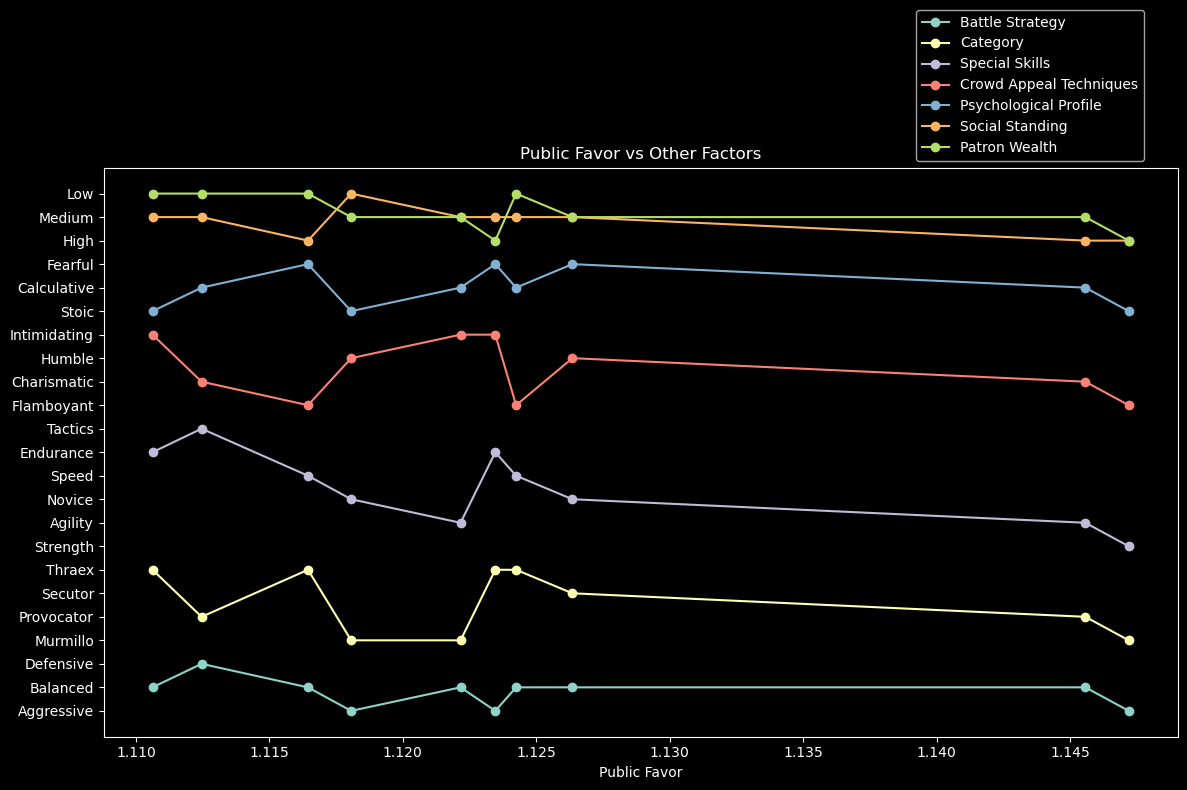

In [30]:
# Visualize "Public Favor" vs other factors which are Str obj values
plt.rcParams["figure.figsize"] = (11, 8)
plt.rcParams["figure.autolayout"] = True

# Battle Strategy vs Public Favor plot
plt.plot(
    gladitor_df["Public Favor"],
    gladitor_df["Battle Strategy"],
    "-o",
    label="Battle Strategy",
)

# Category vs Public Favor plot
plt.plot(
    gladitor_df["Public Favor"],
    gladitor_df["Category"],
    "-o",
    label="Category",
)

# Special Skills vs Public Favor plot
plt.plot(
    gladitor_df["Public Favor"],
    gladitor_df["Special Skills"],
    "-o",
    label="Special Skills",
)

# Crowd Appeal Techniques vs Public Favor plot
plt.plot(
    gladitor_df["Public Favor"],
    gladitor_df["Crowd Appeal Techniques"],
    "-o",
    label="Crowd Appeal Techniques",
)

# Psychological Profile vs Public Favor plot
plt.plot(
    gladitor_df["Public Favor"],
    gladitor_df["Psychological Profile"],
    "-o",
    label="Psychological Profile",
)

# Social Standing vs Public Favor plot
plt.plot(
    gladitor_df["Public Favor"],
    gladitor_df["Social Standing"],
    "-o",
    label="Social Standing",
)

# Patron Wealth vs Public Favor plot
plt.plot(
    gladitor_df["Public Favor"],
    gladitor_df["Patron Wealth"],
    "-o",
    label="Patron Wealth",
)


plt.legend(bbox_to_anchor=(0.75, 1.0), loc="best")
plt.title("Public Favor vs Other Factors")
plt.xlabel("Public Favor")
plt.tight_layout()
plt.show()

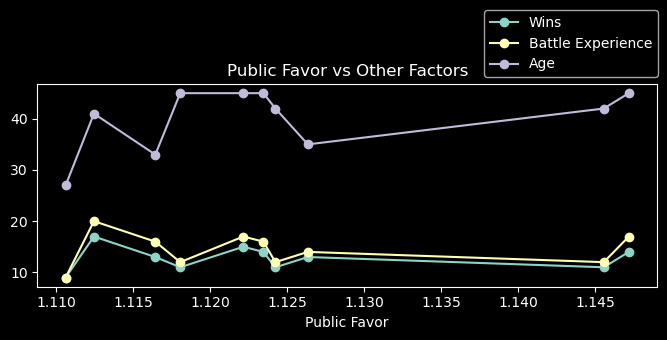

In [29]:
# Visualize "Publi Favor" vs "Wins" & "Battle Experience" factors which are int values

plt.rcParams["figure.figsize"] = (7, 3.5)
plt.rcParams["figure.autolayout"] = True

# Wins vs Public Favor plot
plt.plot(
    gladitor_df["Public Favor"],
    gladitor_df["Wins"],
    "-o",
    label="Wins",
)

# Battle Experience vs Public Favor plot
plt.plot(
    gladitor_df["Public Favor"],
    gladitor_df["Battle Experience"],
    "-o",
    label="Battle Experience",
)

# Age vs Public Favor plot
plt.plot(
    gladitor_df["Public Favor"],
    gladitor_df["Age"],
    "-o",
    label="Age",
)

plt.legend(bbox_to_anchor=(0.71, 1.0), loc="best")
plt.title("Public Favor vs Other Factors")
plt.xlabel("Public Favor")
plt.tight_layout()
plt.show()

## Answer to the question, Can public favor be predicted from attributes such as crowd appeal techniques and social standing ?
### Non of the factors infulence the Public Favor